<a href="https://www.kaggle.com/code/andreamegias/image-dataset-analysis?scriptVersionId=205830839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/623.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/764.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1075.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/771.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/208.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/820.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/473.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1031.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/333.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/1024.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/537.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/45.jpg
/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/Normal/369.jpg
/kaggle/in

# **IMPORTS**

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks, metrics
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet169



# **DATASET ANALYSIS**

In [3]:
!pwd #current directory 

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/kaggle/working


In [4]:
path_to_all_images='/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image/' # path where the images are 
path_to_split_images = '/kaggle/working/splited_dataset' # path where I create the splited images 

In [5]:
#Cheking the images and their shape 
img_normal= load_img(f'{path_to_all_images}Normal/728.jpg')
img_opacity= load_img(f'{path_to_all_images}Lung_Opacity/623.jpg')
img_pneumonia= load_img(f'{path_to_all_images}Viral Pneumonia/8.jpg')

x_normal=img_to_array(img_normal)
x_opacity=img_to_array(img_opacity)
x_vp=img_to_array(img_pneumonia)

x_normal.shape, x_opacity.shape, x_vp.shape 

((299, 299, 3), (299, 299, 3), (299, 299, 3))

In [6]:
#Later on we will turn them into black and white 
f, axarr = plt.subplots(1,3, figsize=(300,100))

axarr[0].imshow(img_normal)

axarr[1].imshow(img_opacity)

axarr[2].imshow(img_pneumonia)


# **BASELINE MODEL**

In [7]:
model = Sequential()

model.add(layers.Input((150, 150, 3))) 
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension


model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation="softmax"))

# And we perform the prediction using softmax as we want to distinguish between 3 different classes 

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921,955 (3.52 MB)

 Trainable params: 921,955 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = optimizers.Adam(learning_rate = 0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])  

In [10]:
#This was tghe first iteration but didnt work to thwn create a train/test set 
batch_size=64
image_directory = image_dataset_from_directory(
    path_to_all_images,
    labels="inferred",
    label_mode="categorical",
    class_names=['Normal', 'Lung_Opacity', 'Viral Pneumonia'],
    seed=123,
    color_mode="grayscale",
    image_size=(150, 150),
    batch_size=batch_size)

Found 3475 files belonging to 3 classes.


In [11]:
#Installing a github repository to make the splits : https://github.com/shoukewei/image_split/blob/main/docs/example.ipynb
!pip install image-data-split

In [12]:
#Import needed function 
from image_split import train_val_test_split

In [13]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1
seed = 42

In [14]:
#Creating the different train and test dataset with the info given above and the names of the directory where the images are and the one where i save the 
# splitted datasets 
train_val_test_split(path_to_all_images, path_to_split_images, train_ratio, test_ratio, seed, val_ratio)

Total number of images: 3475
Number of images in train set: 2780
Number of images in validation set: 347
Number of images in test set: 347


In [15]:
!pwd

/kaggle/working


In [16]:
path_to_split_images

'/kaggle/working/splited_dataset'

In [17]:
! ls /kaggle/working/splited_dataset

test  train  validation


In [18]:
train_ds = image_dataset_from_directory(
    f'{path_to_split_images}/train',
    labels="inferred",
    label_mode="categorical",
    class_names=['Normal', 'Lung_Opacity', 'Viral Pneumonia'],
    seed=123,
    color_mode="rgb",
    image_size=(150, 150),
    batch_size=batch_size)

Found 2780 files belonging to 3 classes.


In [19]:
test_ds = image_dataset_from_directory(
    f'{path_to_split_images}/test',
    labels="inferred",
    label_mode="categorical",
    class_names=['Normal', 'Lung_Opacity', 'Viral Pneumonia'],
    seed=123,
    color_mode="rgb",
    image_size=(150, 150),
    batch_size=batch_size)

Found 347 files belonging to 3 classes.


In [20]:
validation_ds = image_dataset_from_directory(
    f'{path_to_split_images}/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=['Normal', 'Lung_Opacity', 'Viral Pneumonia'],
    seed=123,
    color_mode="rgb",
    image_size=(150, 150),
    batch_size=batch_size)

Found 348 files belonging to 3 classes.


In [27]:
MODEL = "model_1.keras" # it must end in .keras

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [28]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=validation_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30


I0000 00:00:1730929230.051743     105 service.cc:145] XLA service 0x7dce1400cc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730929230.051809     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730929230.051814     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 7/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3800 - loss: 1.0828

I0000 00:00:1730929236.289135     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.5635 - loss: 0.8764 - val_accuracy: 0.7414 - val_loss: 0.5805 - learning_rate: 0.0010
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8007 - loss: 0.5256 - val_accuracy: 0.8103 - val_loss: 0.4704 - learning_rate: 0.0010
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8279 - loss: 0.4519 - val_accuracy: 0.8046 - val_loss: 0.4385 - learning_rate: 0.0010
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8550 - loss: 0.3849 - val_accuracy: 0.8161 - val_loss: 0.4250 - learning_rate: 0.0010
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8353 - loss: 0.4041 - val_accuracy: 0.8190 - val_loss: 0.4127 - learning_rate: 0.0010
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8720 - loss: 0.3430 - val_accuracy: 0.8420 - val_loss: 0.4014 - learning_rate: 0.0010
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8808 - loss: 0.3072 - val_accuracy: 0.

In [29]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('precision')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train precision")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation precision")
    ax[0].legend()
    ax[1].legend()

In [30]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

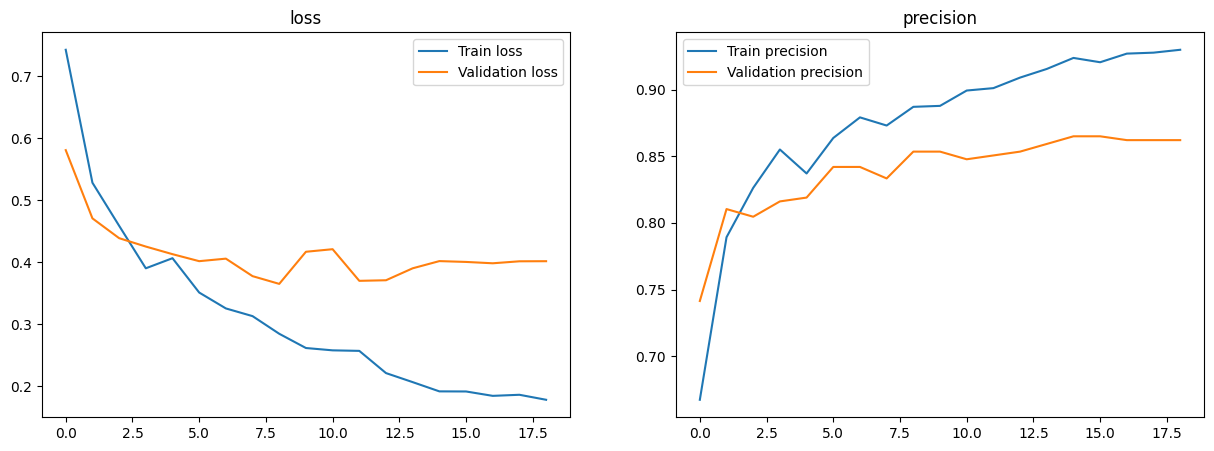

In [31]:
plot_history(history)

In [32]:
model.get_metrics_result()

{'accuracy': 0.8620689511299133, 'loss': 0.4013226330280304}

In [33]:
model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.9190 - loss: 0.2507


[0.261617511510849, 0.910662829875946]

**POINT TO DISCUSS**

- What should be the initial input size ? -> we reduce it to 150,150,1 as they are X-Ray images and 
- Wich metric should we use i donth think accuracy is the right one  -> We think precission 
- Why does precission change the number like precission_2,_3, they way it is called in each iteration even though i create a new model ?
- It actually performs wuite nice no ?
- DOES vgg16 only work with rgb chanels ?


# **TRANFER LEARNING**

# **1. VGG16**

In [43]:
base_model_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

inputs = layers.Input(shape=(150, 150, 3))

x = preprocess_input(inputs)
x = base_model_vgg16(x)


x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(512, activation="relu")(x)#before -128 
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(3, activation="softmax")(x)

# We use the keras Functional API to create our keras model
model_2 = Model(inputs=inputs , outputs=pred)

#FReeze weigths
base_model_vgg16.trainable = False

adam = optimizers.Adam(learning_rate=0.001)
model_2.compile(loss='categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [44]:
MODEL = "model_2.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [45]:
model_2.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add_2 (Add)                     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_3 (TrueDivide)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,074,115 (72.76 MB)

 Trainable params: 4,359,427 (16.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
%%time
history_2 = model_2.fit(
        train_ds,
        epochs=100,
        validation_data=validation_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.6209 - loss: 0.8822 - val_accuracy: 0.8448 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.8883 - loss: 0.3181 - val_accuracy: 0.8621 - val_loss: 0.3601 - learning_rate: 0.0010
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9152 - loss: 0.2168 - val_accuracy: 0.8678 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9216 - loss: 0.2048 - val_accuracy: 0.8707 - val_loss: 0.3333 - learning_rate: 0.0010
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9396 - loss: 0.1549 - val_accuracy: 0.8851 - val_loss: 0.3063 - learning_rate: 0.0010
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9445 - loss: 0.1456
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9445 - loss: 0.

In [95]:
model_2.get_metrics_result()#with less neurons

{'accuracy': 0.8936781883239746, 'loss': 0.42897534370422363}

In [47]:
model_2.get_metrics_result()

{'accuracy': 0.8965517282485962, 'loss': 0.3600180745124817}

In [96]:
model_2.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.9036 - loss: 0.2764


[0.33362850546836853, 0.8933717608451843]

# **2. DENSNET 169**

In [21]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input 

In [22]:
base_model_densenet = DenseNet169(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
inputs = layers.Input(shape=(150, 150, 3))

x = preprocess_input(inputs)
x = base_model_densenet(x)


x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(512, activation="relu")(x)#before 128
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation="relu")(x)#before 64
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)


pred = layers.Dense(3, activation="softmax")(x)

In [24]:
base_model_densenet.trainable = False
model_3 = Model(inputs=inputs , outputs=pred)

In [25]:
adam = optimizers.Adam(learning_rate=0.001)
model_3.compile(loss='categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [26]:
MODEL = "model_3.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [27]:
%%time
history_3 = model_3.fit(
        train_ds,
        epochs=100,
        validation_data=validation_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/100


I0000 00:00:1731003422.479735      74 service.cc:145] XLA service 0x7ad88c003b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731003422.479796      74 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731003422.479802      74 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/44 ━━━━━━━━━━━━━━━━━━━━ 29:51 42s/step - accuracy: 0.3125 - loss: 2.6916

I0000 00:00:1731003446.114487      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5226 - loss: 5.4482 - val_accuracy: 0.8132 - val_loss: 0.6003 - learning_rate: 0.0010
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.8189 - loss: 0.6047 - val_accuracy: 0.8477 - val_loss: 0.3495 - learning_rate: 0.0010
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8617 - loss: 0.3678 - val_accuracy: 0.8420 - val_loss: 0.3750 - learning_rate: 0.0010
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8849 - loss: 0.2987 - val_accuracy: 0.8678 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9076 - loss: 0.2491 - val_accuracy: 0.8707 - val_loss: 0.3024 - learning_rate: 0.0010
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9041 - loss: 0.2546 - val_accuracy: 0.8851 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9174 - loss: 0.2305 - val_accur

In [28]:
model_3.get_metrics_result() 

{'accuracy': 0.8994252681732178, 'loss': 0.3248656094074249}

In [28]:
model_3.get_metrics_result()#the best one 

{'accuracy': 0.9109195470809937, 'loss': 0.3577299118041992}

In [29]:
model_3.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9198 - loss: 0.2363


[0.24784556031227112, 0.9135446548461914]

In [31]:
!pwd

/kaggle/working


In [32]:
! mkdir models

mkdir: cannot create directory 'models': File exists


In [33]:
model_saved = model_3.save(f'models/{MODEL}')

In [37]:
!cd models

In [38]:
!ls

model_3.keras  models  splited_dataset


# **3. CONVNEXT**

In [55]:
from tensorflow.keras.applications import ConvNeXtSmall
 
from tensorflow.keras.applications.convnext import preprocess_input

In [56]:
base_model_convNeXtSmall= ConvNeXtSmall(
    include_top=False,
    include_preprocessing=False,
    weights='imagenet',
    input_shape=(150,150,3)

)

198551472/198551472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [57]:
inputs = layers.Input(shape=(150, 150, 3))

x = preprocess_input(inputs)
x = base_model_convNeXtSmall(x)


x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(512, activation="relu")(x)#before 128
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation="relu")(x)#before 64
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(3, activation="softmax")(x)

In [58]:
base_model_convNeXtSmall.trainable = False

In [59]:
model_4 = Model(inputs=inputs , outputs=pred)

In [60]:
adam = optimizers.Adam(learning_rate=0.001)
model_4.compile(loss='categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

In [61]:
MODEL = "model_4.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [62]:
%%time
history_4 = model_4.fit(
        train_ds,
        epochs=100,
        validation_data=validation_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/100


I0000 00:00:1730930049.992550    1410 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_66', 1048 bytes spill stores, 1044 bytes spill loads

I0000 00:00:1730930052.980071    1411 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 2596 bytes spill stores, 2580 bytes spill loads



43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5876 - loss: 1.8428

I0000 00:00:1730930078.287792    1448 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 2596 bytes spill stores, 2580 bytes spill loads

I0000 00:00:1730930082.099370    1450 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_66', 1048 bytes spill stores, 1044 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 923ms/step - accuracy: 0.5919 - loss: 1.8143 - val_accuracy: 0.8333 - val_loss: 0.3886 - learning_rate: 0.0010
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.8223 - loss: 0.4865 - val_accuracy: 0.8420 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 0.8739 - loss: 0.3294 - val_accuracy: 0.8391 - val_loss: 0.3434 - learning_rate: 0.0010
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.8882 - loss: 0.2792 - val_accuracy: 0.8477 - val_loss: 0.3989 - learning_rate: 0.0010
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.8841 - loss: 0.2915 - val_accuracy: 0.8477 - val_loss: 0.3850 - learning_rate: 0.0010
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.9059 - loss: 0.2388 - val_accuracy: 0.8707 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.9220 - loss: 0.1923 - v

In [115]:
model_4.get_metrics_result()

{'accuracy': 0.8678160905838013, 'loss': 0.37972575426101685}

In [63]:
model_4.get_metrics_result()

{'accuracy': 0.8678160905838013, 'loss': 0.4288357198238373}

In [116]:
#with less neurons
f'Model 1 metrics : {model.get_metrics_result()}', f'Model 2 metrics : {model_2.get_metrics_result()}',f'Model 3 metrics : {model_3.get_metrics_result()}', f'Model 4 metrics : {model_4.get_metrics_result()}'

("Model 1 metrics : {'accuracy': 0.890489935874939, 'loss': 0.26441138982772827}",
 "Model 2 metrics : {'accuracy': 0.8933717608451843, 'loss': 0.33362850546836853}",
 "Model 3 metrics : {'accuracy': 0.8991354703903198, 'loss': 0.27739018201828003}",
 "Model 4 metrics : {'accuracy': 0.8678160905838013, 'loss': 0.37972575426101685}")

In [64]:
#with more neurons
f'Model 1 metrics : {model.get_metrics_result()}', f'Model 2 metrics : {model_2.get_metrics_result()}',f'Model 3 metrics : {model_3.get_metrics_result()}', f'Model 4 metrics : {model_4.get_metrics_result()}'

("Model 1 metrics : {'accuracy': 0.910662829875946, 'loss': 0.261617511510849}",
 "Model 2 metrics : {'accuracy': 0.8965517282485962, 'loss': 0.3600180745124817}",
 "Model 3 metrics : {'accuracy': 0.8994252681732178, 'loss': 0.3167743682861328}",
 "Model 4 metrics : {'accuracy': 0.8678160905838013, 'loss': 0.4288357198238373}")

# **WITH DATA AUGMENTATION**

https://towardsdatascience.com/complete-guide-to-data-augmentation-for-computer-vision-1abe4063ad07

 For example, random rotation and reflection along the x-axis are not recommended for the X-ray imaging dataset.  from https://www.datacamp.com/tutorial/complete-guide-data-augmentation

- model_2.add(layers.RandomFlip("horizontal"))
- model_2.add(layers.RandomZoom(0.1))
- model_2.add(layers.RandomTranslation(0.2, 0.2))
- model_2.add(layers.RandomRotation(0.1))

In [23]:
data_augmentation = Sequential()
data_augmentation.add(layers.RandomZoom(0.3))
data_augmentation.add(layers.RandomFlip("vertical"))
data_augmentation.add(layers.RandomBrightness((-1.0,1.0)))



In [24]:
base_model_with_aug = DenseNet169(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

inputs = layers.Input(shape=(150, 150, 3))
#x = layers.RandomFlip("horizontal")(inputs)
#x = layers.RandomBrightness(0.3, value_range=(0, 255))(x)
#x = layers.RandomZoom(0.1)(x)
#x =layers.RandomTranslation(0.2, 0.2)(x)
x = data_augmentation(inputs)

x = preprocess_input(inputs)
x = base_model_with_aug(x)


x = layers.Flatten()(x) # Followed by our custom dense layers, tailored to our binary task

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
pred = layers.Dense(3, activation="softmax")(x)


#FReeze weigths
base_model_with_aug.trainable = False
# We use the keras Functional API to create our keras model
model_5 = Model(inputs=inputs , outputs=pred)


adam = optimizers.Adam(learning_rate=0.001)
model_5.compile(loss='categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
MODEL = "model_5.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [26]:
%%time
history_5 = model_5.fit(
        train_ds,
        epochs=100,
        validation_data=validation_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/100


I0000 00:00:1730921522.080059     111 service.cc:145] XLA service 0x7d48d400f500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730921522.080127     111 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730921522.080134     111 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/44 ━━━━━━━━━━━━━━━━━━━━ 31:27 44s/step - accuracy: 0.2031 - loss: 13.3023

I0000 00:00:1730921546.390562     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.4635 - loss: 22.2060 - val_accuracy: 0.7414 - val_loss: 1.7338 - learning_rate: 0.0010
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.6082 - loss: 2.8489 - val_accuracy: 0.7241 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6451 - loss: 0.8286 - val_accuracy: 0.7328 - val_loss: 0.7519 - learning_rate: 0.0010
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.6801 - loss: 0.7993 - val_accuracy: 0.6293 - val_loss: 0.8756 - learning_rate: 0.0010
Epoch 5/100
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5960 - loss: 0.8122
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5955 - loss: 0.8129 - val_accuracy: 0.6667 - val_loss: 0.7429 - learning_rate: 0.0010
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5979 - loss: 0.7815 - val_accurac

In [46]:
model_5.get_metrics_result()

{'accuracy': 0.8448275923728943, 'loss': 0.5376673936843872}